#### Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Loading Dataset

In [2]:
data = pd.read_csv("dataset/diabetes_prediction_dataset.csv")

#### EDA

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
data.shape

(100000, 9)

In [5]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#### Checking for Null Values

In [7]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### Handling Categorical Columns

In [8]:
le = LabelEncoder()
data['gender']= le.fit_transform(data['gender'])
data['smoking_history']= le.fit_transform(data['smoking_history'])

In [9]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [10]:
print(f"Number of the duplicated rows in our train data = {data.duplicated().sum()}\n\n")
data.drop_duplicates(inplace=True)

data.head()

Number of the duplicated rows in our train data = 3854




,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


#### Checking for class distribuations

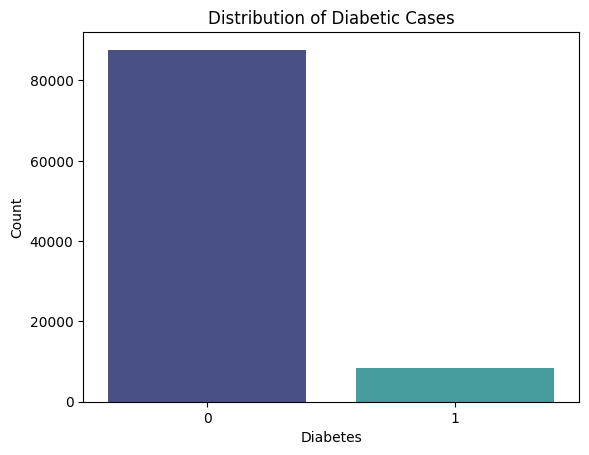

In [11]:
sns.barplot(
    x=data["diabetes"].value_counts().index,
    y=data["diabetes"].value_counts().values,
    palette="mako"
)
plt.title("Distribution of Diabetic Cases")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

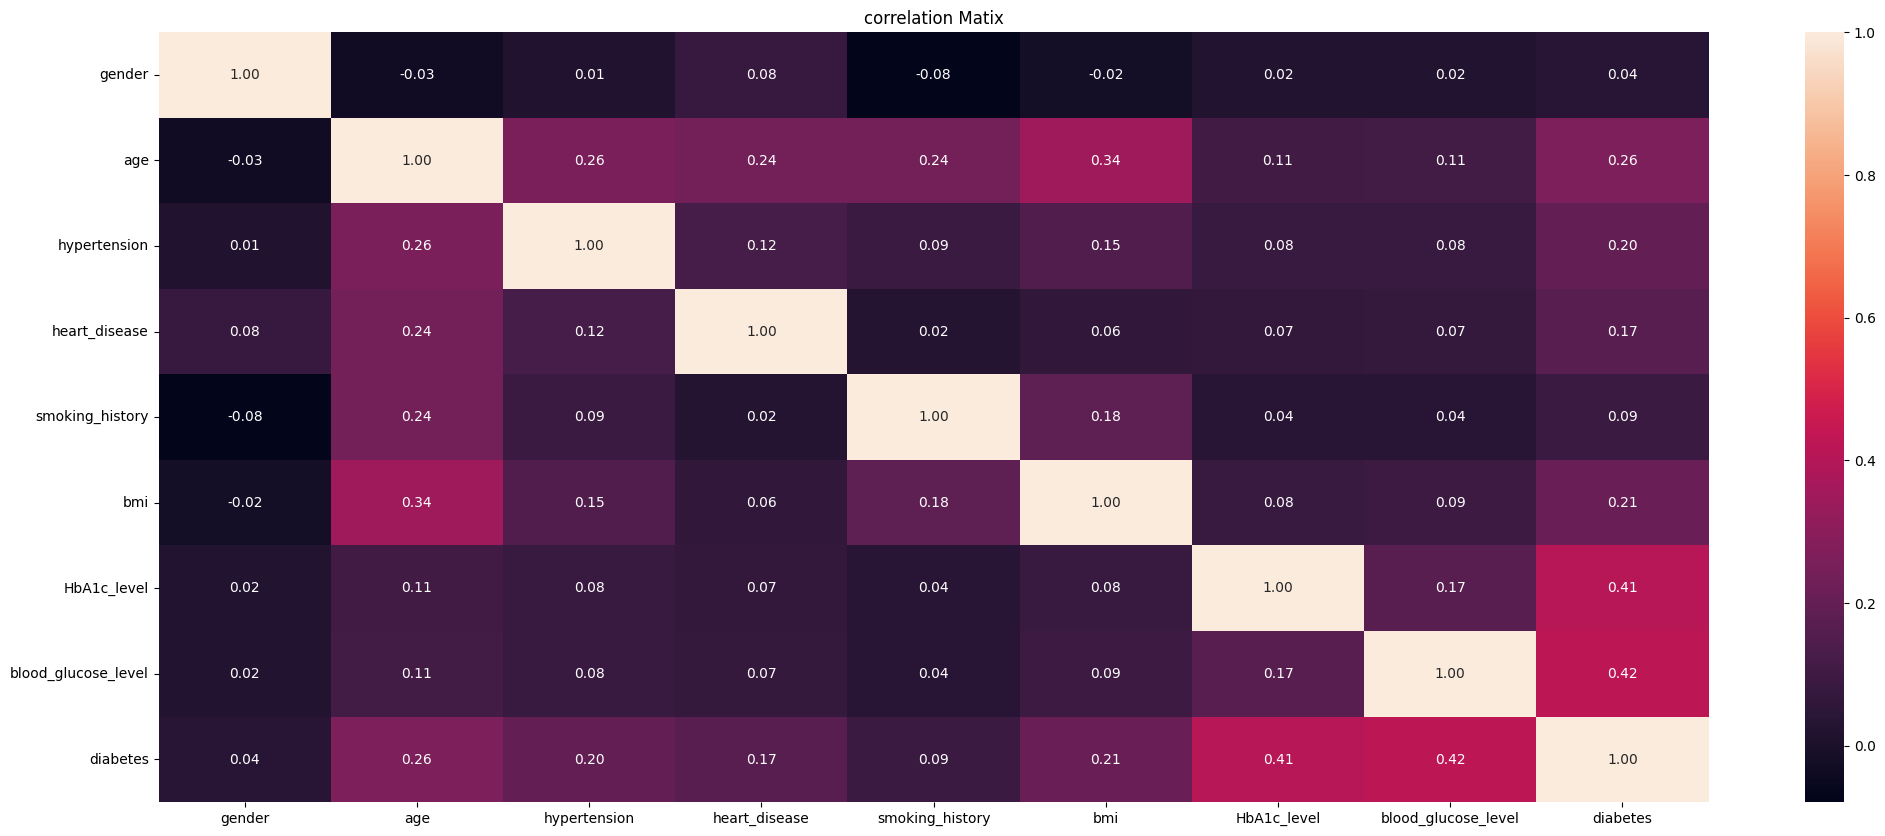

In [12]:
plt.figure(figsize=(25, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("correlation Matix")
plt.show()

#### Spliting dataset in to Test and Train

In [13]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scalling Data

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Implementing Models

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "Support Vector Classifier": SVC(),
}

In [16]:
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    model_scores[name] = {
        "model": model,
        "y_pred": y_pred,
        "accuracy": acc,
        "report": report,
        "confusion_matrix": cm
    }

    print(f"--- {name} ---")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.9568902756110245
Confusion Matrix:
 [[17326   183]
 [  646  1075]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.85      0.62      0.72      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



--- Random Forest ---
Accuracy: 0.968798751950078
Confusion Matrix:
 [[17445    64]
 [  536  1185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       0.95      0.69      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



--- XGBoost ---
Accuracy: 0.9699427977119085
Confusion Matrix:
 [[17457    52]
 [  526 

#### LSTM

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score
from keras.layers import Dropout


# Load dataset
df = pd.read_csv('dataset/diabetes_prediction_dataset.csv')

# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate features and target
X = df.drop('diabetes', axis=1) 
y = df['diabetes']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Predict and evaluate
y_pred = (model.predict(X_test_lstm) > 0.5).astype("int32")
print("LSTM Test Accuracy:", accuracy_score(y_test, y_pred))

c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9382 - loss: 0.1945 - val_accuracy: 0.9606 - val_loss: 0.1100
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9606 - loss: 0.1100 - val_accuracy: 0.9662 - val_loss: 0.0965
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9642 - loss: 0.1013 - val_accuracy: 0.9664 - val_loss: 0.0947
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 0.9651 - loss: 0.0982 - val_accuracy: 0.9689 - val_loss: 0.0887
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9661 - loss: 0.0951 - val_accuracy: 0.9663 - val_loss: 0.0927
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9671 - loss: 0.0922 - val_accuracy: 0.9697 - val_loss: 0.0874
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.9694 - loss: 0.0891 - val_accuracy: 0.9683 - val_loss: 0.0885
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.9693 - lo

#### BIGRU

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from sklearn.metrics import accuracy_score
import numpy as np

# Reshape input to be [samples, timesteps, features]
X_train_bigru = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_bigru = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build Bidirectional GRU model
model_bigru = Sequential()
model_bigru.add(Bidirectional(GRU(64, activation='relu'), input_shape=(1, X_train.shape[1])))
model_bigru.add(Dense(1, activation='sigmoid'))

model_bigru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_bigru = model_bigru.fit(
    X_train_bigru, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_bigru, y_test),
    verbose=1
)

# Predict and evaluate
y_pred_bigru = (model_bigru.predict(X_test_bigru) > 0.5).astype("int32")
print("BIGRU Test Accuracy:", accuracy_score(y_test, y_pred_bigru))

c:\Users\Javed\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9514 - loss: 0.1677 - val_accuracy: 0.9618 - val_loss: 0.1099
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9661 - loss: 0.1024 - val_accuracy: 0.9682 - val_loss: 0.0967
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9692 - loss: 0.0928 - val_accuracy: 0.9700 - val_loss: 0.0903
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9689 - loss: 0.0935 - val_accuracy: 0.9708 - val_loss: 0.0869
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9711 - loss: 0.0863 - val_accuracy: 0.9718 - val_loss: 0.0841
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9708 - loss: 0.0851 - val_accuracy: 0.9716 - val_loss: 0.0833
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9714 - loss: 0.0842 - val_accuracy: 0.9721 - val_loss: 0.0828
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9708 - loss: 0